## <div style="direction:ltr;text-align:left;">In this repo we will review all of thing that i learned about Opencv :D.</div>
<div> We will go from simple concepts to complex concepts and cover every thing that I know.</div>
<div>I hope that this repo can help you learn something new about Opencv.</div> 

In [1]:
#import modules
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

## <div style="direction:ltr;text-align:left;">We will start with a simple lesson reading images and showing them.</div>

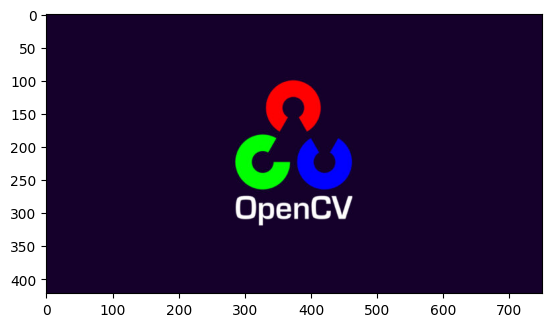

In [5]:
# All of pictures that you will need is in the 'Pictures' file.
img = cv.imread("Pictures/opencv.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
"""
When we read images using opencv their color channels are 'B-G-R' 
but matplotlib can show images correctly when their color channels are 'R-G-B'.
"""
plt.imshow(img)

## <div style="direction:ltr;text-align:left;">Cropping pictures and figure in matplotlib</div>

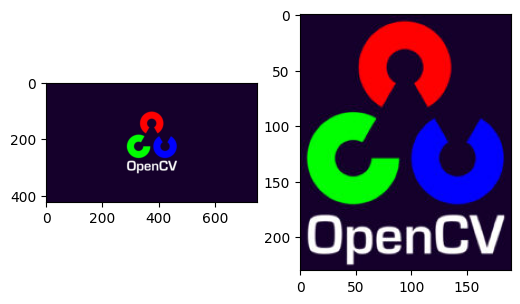

In [40]:
img = cv.imread("Pictures/opencv.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
#We can use pixels for croppting every part that we want.
cropped_img = img[95:325,280:470]
#You can use 'figure' to create set of images to show and set the size of the set using 'figsize' parameter.
#figsize = [Width,Height]
plt.figure(figsize=[6,10])
#Use 'subplot' to set the position of image.
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)

plt.imshow(cropped_img)

## <div style="direction:ltr;text-align:left;">Color channels</div>

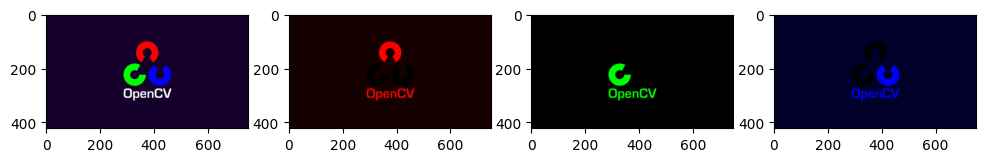

In [15]:
img = cv.imread("Pictures/opencv.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
#First get all of color channels for your image using split.
R_channel,G_channel,B_channel = cv.split(img)
#Create a matrix with zero values like one of your color channels.
black_channel = np.zeros_like(R_channel)
#Create a new image and pass the color channel that you want to show.
Red_image = cv.merge([R_channel,black_channel,black_channel])
Green_image = cv.merge([black_channel,G_channel,black_channel])
blue_image = cv.merge([black_channel,black_channel,B_channel])
#After that show the images.
plt.figure(figsize=[12,15])
plt.subplot(141)
plt.imshow(img)
plt.subplot(142)
plt.imshow(Red_image)
plt.subplot(143)
plt.imshow(Green_image)
plt.subplot(144)
plt.imshow(blue_image)



## <div style="direction:ltr;text-align:left;">Gray images</div>

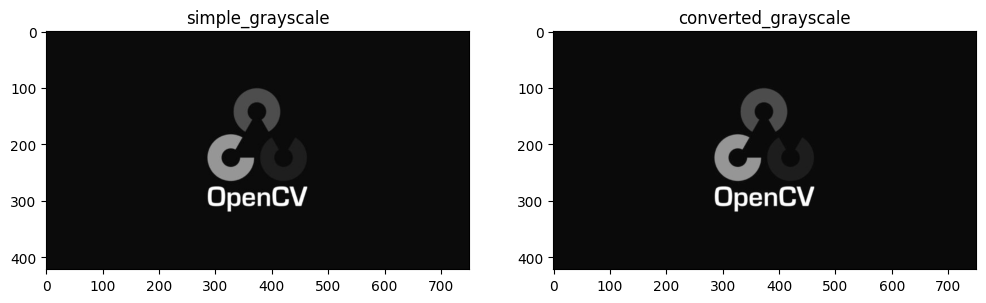

In [28]:
#We can pass 0 for flags to make our image a grayscale image
simple_grayscale = cv.imread("Pictures/opencv.jpg",0)
converted_grayscale = cv.imread("Pictures/opencv.jpg")
#Or we can convert it to grayscale image.
converted_grayscale = cv.cvtColor(converted_grayscale,cv.COLOR_BGR2GRAY)
#You have to pass 'gray' for 'cmap' in 'imshow' to show grayscale images in matplotlib.
plt.figure(figsize=[12,15])
plt.subplot(121)
#Put title for your image with 'title'.
plt.title("simple_grayscale")
plt.imshow(simple_grayscale,cmap="gray")
plt.subplot(122)
plt.title("converted_grayscale")
plt.imshow(converted_grayscale,cmap="gray")


## <div style="direction:ltr;text-align:left;">Transparent image</div>

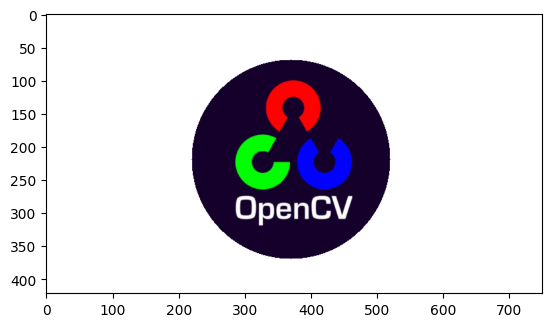

In [15]:
img = cv.imread("Pictures/opencv.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
#Get hight and width for your image.
hight,width = img.shape[0:2]
#Create a 4 channel iamge.
transparent_img = np.zeros((hight,width,4),np.uint8)
#Set channels 0 to 2 equal to your image.
transparent_img[...,0:3] = img
#Create a mask.
mask = np.zeros((hight,width),np.uint8)
#Set part of image that you want to be shown.
cv.circle(mask, (370, 220),150, (255,255,255), -1)
#Set channel 3 equal to your mask.
transparent_img[...,3] = mask
plt.imshow(transparent_img)


## <div style="direction:ltr;text-align:left;">Water mark</div>

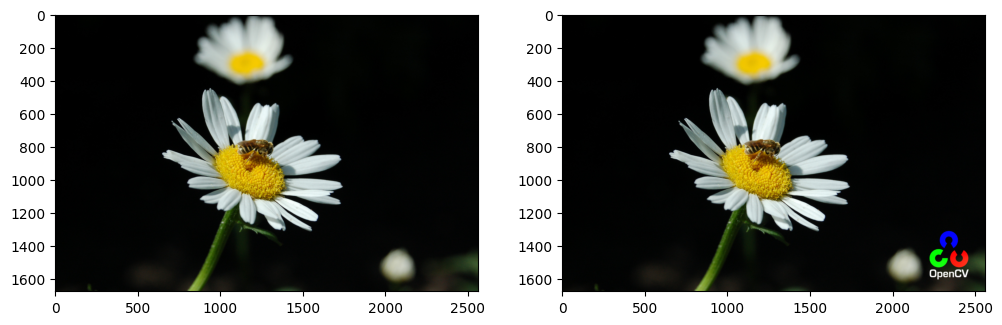

In [23]:
img = cv.imread("Pictures/bee-on-daisy.jpg")
logo = cv.imread("Pictures/black_cv.png")#This method for water marking mustly works when the logo backgroud is balck. 
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
#Get hight and width of logo.
hight, width = logo.shape[0:2]
#Create a black image with size of original.
black_image = np.zeros_like(img,np.uint8)
#Set the place that you want to put your logo.
black_image[1300:hight+1300,2200:width+ 2200] = logo
#Add orginal image to black image.
black_image = cv.add(black_image,img)
plt.figure(figsize=[12,15])
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(black_image)
  

## <div style="direction:ltr;text-align:left;">Look Up Table (lut)</div>

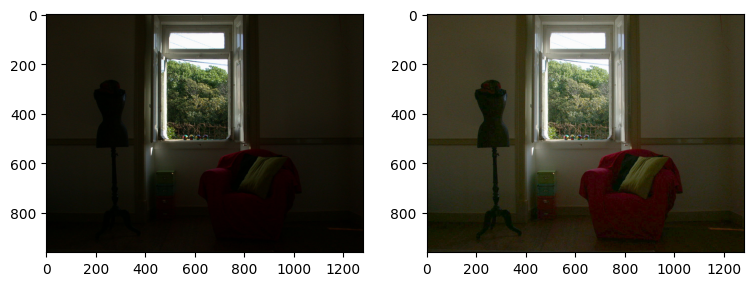

In [53]:
img = cv.imread("Pictures/dark_image.jpg")
#Set amount of brigtness that you want.
gama = 0.6
#Create a  matrix that all of values are in range of (1,256) .
look_up_table = np.empty((1,256), np.uint8)
#Do all of this stuf to Increase image brightness.
for i in range(256):
    look_up_table[0,i] = ((i/255) ** gama) * 255
#Apply look_up_table to your image.
final_img = cv.LUT(img,look_up_table)
final_img = cv.cvtColor(final_img,cv.COLOR_BGR2RGB)
plt.figure(figsize=[9,12])
plt.subplot(121)
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(final_img)

## <div style="direction:ltr;text-align:left;">Video</div>

In [ ]:
video_cap = cv.VideoCapture("Videos/race_car.mp4")
while True :
    frame, ret = video_cap.read()
    if video_cap.isOpened() == False :
        break
    #I cant show you the output but you can see it yourself.
    cv.imshow("frame",frame)
    if cv.waitKey(1) == 27 :
        break

## <div style="direction:ltr;text-align:left;">save video</div>

In [18]:

 
cap = cv.VideoCapture("Videos/race_car.mp4")

# Get video height and width
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)

# we are using x264 codec for mp4
fourcc = cv.VideoWriter_fourcc(*'X264')
writer = cv.VideoWriter('Videos/OUTPUT.mp4', fourcc=fourcc,
                     fps=20, frameSize=(int(width), int(height)))

while True:
    ret, frame = cap.read()
    if not ret: 
        break # break if cannot receive frame
    # convert to grayscale
    writer.write(frame) # write frame    
    if cv.waitKey(1) & 0xFF == ord('q'): # on press of q break
        break
        
# release and destroy windows
writer.release()
cap.release()
cv.destroyAllWindows()

## <div style="direction:ltr;text-align:left;">Thersh Hold/Adaptive thersh hold</div>

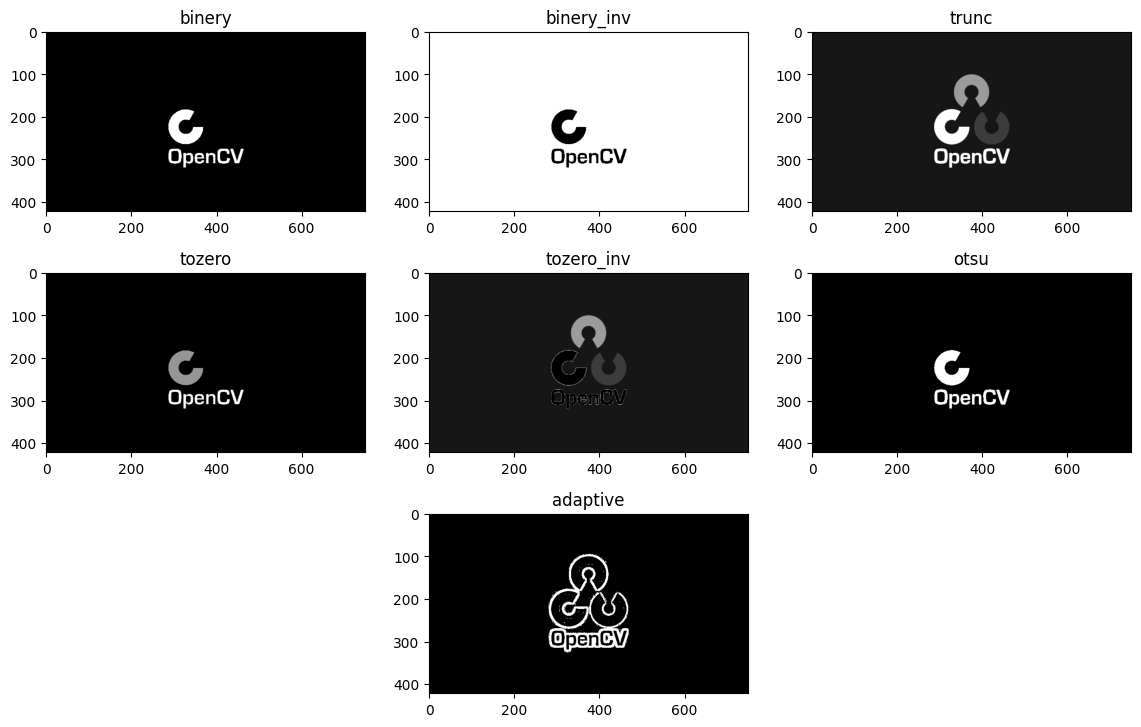

In [75]:
img = cv.imread("Pictures/opencv.jpg",0)
#First we get a grayscale image and we set the thershhold
ret,thersh_hold_binery = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thersh_hold_binery_inv = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thersh_hold_trunc = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thersh_hold_tozero = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thersh_hold_tozero_inv = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
#This method can get best threshold it can be useful.
ret,thersh_hold_otsu = cv.threshold(img,127,255,cv.THRESH_OTSU)
#This method find best threshold for each part of image.
adaptive_thershhold = cv.adaptiveThreshold(img,275,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,11,2)

plt.figure(figsize=[14,12])
plt.subplot(431)
plt.title("binery")
plt.imshow(thersh_hold_binery,cmap="gray")
plt.subplot(432)
plt.title("binery_inv")
plt.imshow(thersh_hold_binery_inv,cmap="gray")
plt.subplot(433)
plt.title("trunc")
plt.imshow(thersh_hold_trunc,cmap="gray")
plt.subplot(434)
plt.title("tozero")
plt.imshow(thersh_hold_tozero,cmap="gray")
plt.subplot(435)
plt.title("tozero_inv")
plt.imshow(thersh_hold_tozero_inv,cmap="gray")
plt.subplot(436)
plt.title("otsu")
plt.imshow(thersh_hold_otsu,cmap="gray")
plt.subplot(438)
plt.title("adaptive")
plt.imshow(adaptive_thershhold,cmap="gray")



 ## <div style="direction:ltr;text-align:left;">Morphology</div>

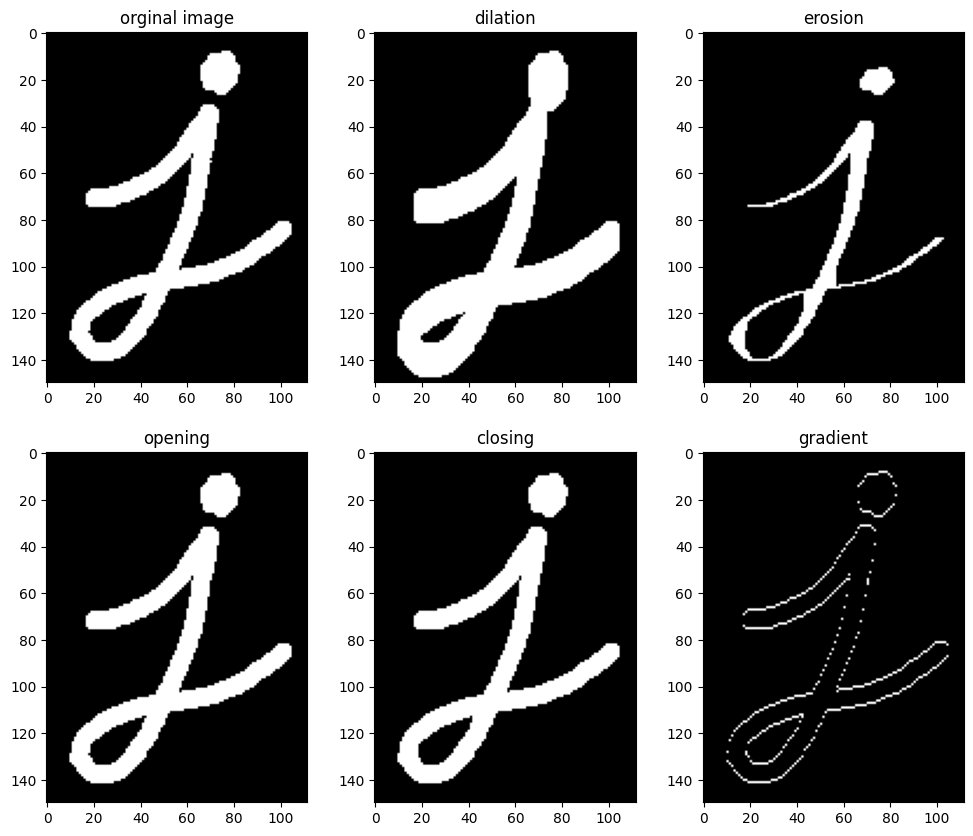

In [78]:
img = cv.imread("Pictures/Morphology.png",0)

ret,thersh_hold_binery = cv.threshold(img,127,255,cv.THRESH_BINARY)
dilation = cv.morphologyEx(img,cv.MORPH_DILATE,(5,5),iterations=7)    
erosion = cv.morphologyEx(img,cv.MORPH_ERODE,(5,5),iterations=7)   
opening = cv.morphologyEx(img,cv.MORPH_OPEN,(5,5))   
closing = cv.morphologyEx(img,cv.MORPH_CLOSE,(5,5)) 
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, (5,5))
plt.figure(figsize=[12,10])
plt.subplot(231)
plt.title("orginal image")
plt.imshow(img,cmap="gray")
plt.subplot(232)
plt.title("dilation")
plt.imshow(dilation,cmap="gray")
plt.subplot(233)
plt.title("erosion")
plt.imshow(erosion,cmap="gray")
plt.subplot(234)
plt.title("opening")
plt.imshow(opening,cmap="gray")
plt.subplot(235)
plt.title("closing")
plt.imshow(closing,cmap="gray")
plt.subplot(236)
plt.title("gradient")
plt.imshow(gradient,cmap="gray")